## Combined Cycle power plant electricity prediction using LR

1. Domain Exploration
    - understanding the business process, how operations function on shop floor
    - interacting with stakeholders on shop floor, understanding business assumptions and customer behaviour
    - Understanding data sources, lifecycle of data
    

2. Data Collection and Data Exploration
    - collect relevant data from multiple sources, build a dataset
    - perform generic analysis on data to identify common issues with data
    

3. Data Cleaning
    - handle missing values
    - handle duplicated entries
    - handle outliers, unwanted columns
    
    
4. Feature Engineering
    - Feature Extraction
    - Exploratory Data ANalytics / Root Cause Analytics

        - Data Visualization
            - Univariate Analysis
            - Bivariate Analysis
            - Multivariate Analysis

        - Statistical Research
            - Correlation Analysis
            - ANOVA
            - Chi Square test
        
        
        
5. Preprocessing the features
    - Encoding the categoric attributes
    - Normalization of numeric attributes
    - separate whole dataset into train and test set
    
    
6. Apply Machine Learning
    - pick a learning algorithm
    - train the model
    
 
7. Performance Analysis
    - pick suitable metrics to assess performance of ML model
    
    
8. Optimization and Tuning
    - optimize the model, tune hyperparameters
    
    
9. Deployment
    - Export the trained model as object file
    - deploy the inferense pipeline as REST API service
    
    
10. Monitor performance of model in production
     - periodic data drift analysis

## 2. Data collection and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"E:\MLIoT\ML\dataset\combined_cycle_power_plant_dataset.xlsx"
df = pd.read_excel(path)
df.shape

(9568, 5)

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Observations:
    
    - target attribute: PE
    - unwanted columns: None
    - features: all numeric, AT, V, AP, RH

## 3. Data Cleaning

In [5]:
#check for duplicated entries
df.duplicated().sum()

41

In [6]:
# drop the duplicated rows
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(9568, 5)
(9527, 5)


In [7]:
# check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
# check for outliers
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

## 4. Feature Engineering
### Feature Selection

### Stastical Research
#### Correlation Analysis

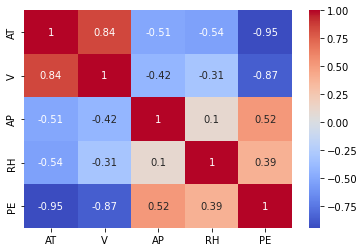

In [9]:
cor = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

#### ANOVA - ftest

Null Hypothesis = means of a numeric attribute across multiple categories are similar
    e.g. = mean of creditscore across Exited=0 amd exited=1 are similar

    
    To use any hypothesis testing technique, we have to select a confidence interval (business confidence), CI = 95%
    
    signficance level, alpha = 1 - CI = 1 - 0.95 = 0.05

When you apply ANOVA, you will get a pvalue

- if pvalue > alpha = we accept the null hypothesis, we accept that means are similar for multiple groups - not important
- if pvalue < alpha = we reject the null hypothesis, we agree that means are different for multiple groups - important

In [10]:
xnum = df.drop(columns=['PE'],inplace=False)
y = df.PE

from sklearn.feature_selection import f_regression
fscore,pvalue = f_regression(xnum,y)

for i in range(len(xnum.columns)):print(xnum.columns[i],pvalue[i])

AT 0.0
V 0.0
AP 0.0
RH 0.0


In [11]:
x = df[['AT','V','AP','RH']]
y = df['PE']

## 5. Perprocessing of features

In [12]:
x.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


#### split dataset into train and test set
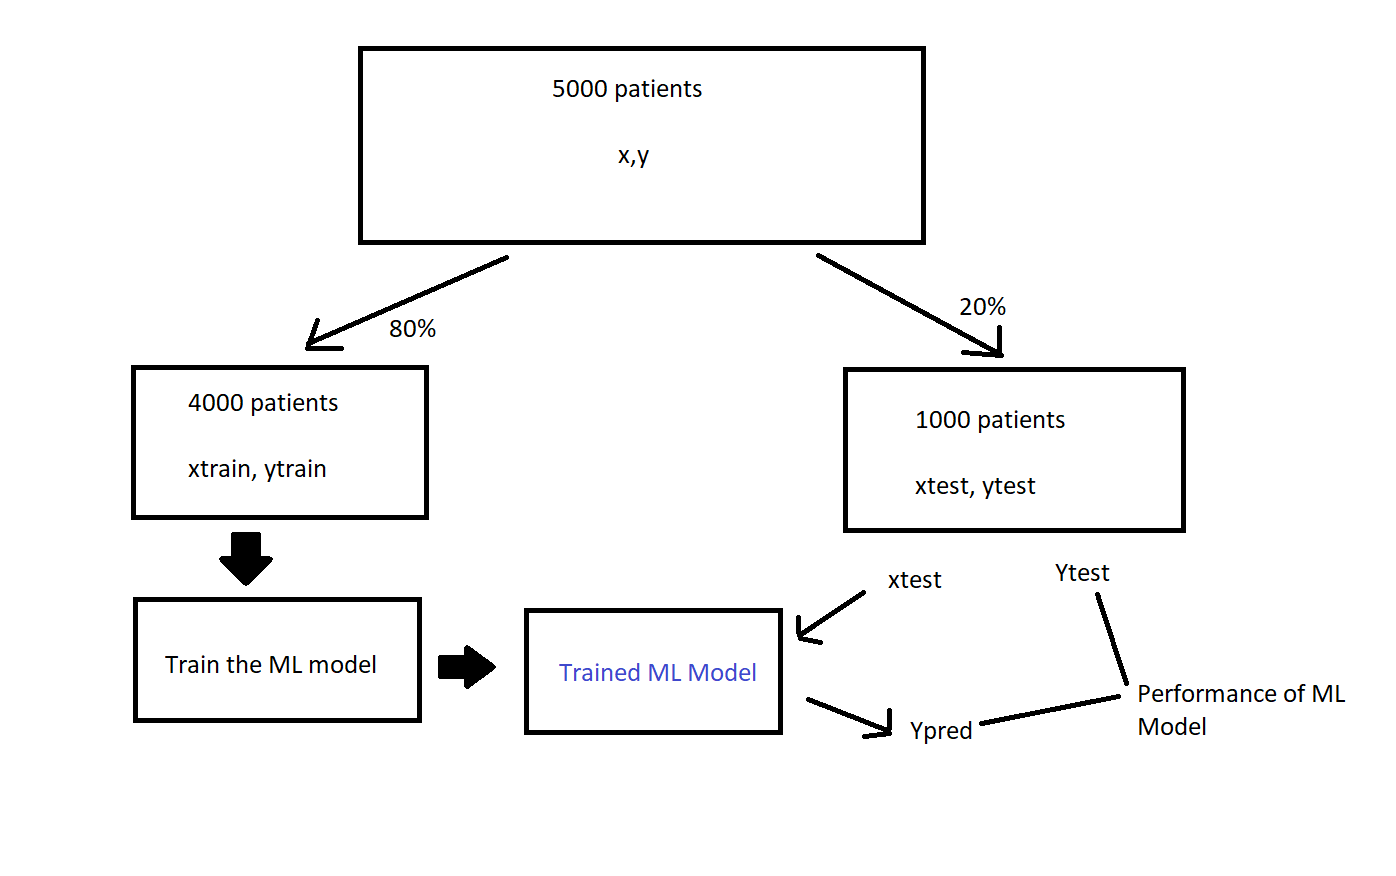

In [13]:
y.shape

(9527,)

In [14]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)
print(x.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(9527, 4) (7621, 4) (1906, 4)
(9527,) (7621,) (1906,)


## 6. Apply ML algorithm - linear regression

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# train the model using train data = xtrain,ytrain
model.fit(xtrain,ytrain)

LinearRegression()

## 7. Performance Analysis

In [16]:
newdata = [[11.8,40.66,1017.13,97.2]]
model.predict(newdata)

array([469.57026588])

In [17]:
# feed the test data to model and get predictions
ypred = model.predict(xtest)

In [18]:
ypred.shape

(1906,)

In [19]:
ytest.shape

(1906,)

In [20]:
# computing r2 score
from sklearn import metrics

metrics.r2_score(ytest,ypred)

0.9294405418373626

In [21]:
metrics.mean_absolute_error(ytest,ypred)

3.59165103085831

## 9. Deployment: Export the trained model as object file

In [22]:
# export the trained model as pickle file (pkl file)

import joblib
joblib.dump(model,"ccpp_model.pkl")

['ccpp_model.pkl']

In [23]:
joblib.dump(model,"../Deployment/ccpp_model.pkl")

['../Deployment/ccpp_model.pkl']